# Decision Trees - Complete Guide

## Table of Contents
1. [What is a Decision Tree?](#what-is-dt)
2. [How Decision Trees Work - The Theory](#how-dt-works)
3. [Visual Demonstrations](#visual-demos)
4. [Hyperparameter Tuning](#hyperparameter-tuning)
5. [Feature Importance Analysis](#feature-importance)
6. [Practical Examples](#practical-examples)
7. [Decision Tree vs Random Forest](#dt-vs-rf)
8. [Summary and Key Takeaways](#summary)

---

## 1. What is a Decision Tree? {#what-is-dt}

A **Decision Tree** is a supervised machine learning algorithm that creates a tree-like model of decisions and their possible consequences. It's like a flowchart that helps make decisions by asking a series of yes/no questions.

### Key Characteristics:
- **Tree Structure**: Root node, internal nodes, and leaf nodes
- **Decision Rules**: Each node represents a decision based on a feature
- **Leaf Predictions**: Final nodes contain the predicted class/value
- **Interpretable**: Easy to understand and visualize
- **Non-parametric**: No assumptions about data distribution

### Types of Decision Trees:
- **Classification Trees**: Predict categorical outcomes
- **Regression Trees**: Predict continuous values


## 2. How Decision Trees Work - The Theory {#how-dt-works}

### The Algorithm:
1. **Start** with all data at the root node
2. **Choose** the best feature to split on
3. **Split** the data based on the feature
4. **Repeat** for each child node until stopping criteria met
5. **Assign** class/value to leaf nodes

### Splitting Criteria:

#### For Classification:
- **Gini Impurity**: Measures how often a randomly chosen element would be incorrectly labeled
- **Entropy**: Measures the amount of information in a dataset
- **Information Gain**: Reduction in entropy after a split

#### For Regression:
- **Mean Squared Error (MSE)**: Minimizes variance in target values
- **Mean Absolute Error (MAE)**: Minimizes absolute differences

### Stopping Criteria:
- **Maximum depth** reached
- **Minimum samples** per leaf
- **Minimum samples** to split
- **Pure nodes** (all same class)


## 3. Visual Demonstrations {#visual-demos}

Let's start by importing the necessary libraries and creating some visualizations:


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_regression
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print("🌳 Ready to explore Decision Trees!")


✅ Libraries imported successfully!
🌳 Ready to explore Decision Trees!


### 3.1 Simple 2D Classification Example


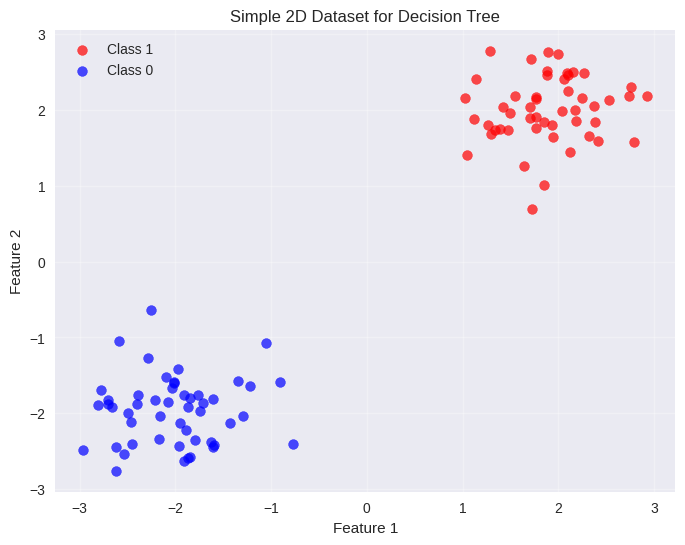

🎯 Simple 2D dataset created!
Dataset shape: (100, 2)
Classes: [0. 1.]


In [16]:
# Create a simple 2D dataset
def create_simple_2d_data():
    """Create a simple 2D dataset for visualization"""
    np.random.seed(42)
    
    # Class 1: Points in upper right
    x1 = np.random.normal(2, 0.5, 50)
    y1 = np.random.normal(2, 0.5, 50)
    
    # Class 2: Points in lower left
    x2 = np.random.normal(-2, 0.5, 50)
    y2 = np.random.normal(-2, 0.5, 50)
    
    X = np.column_stack([np.concatenate([x1, x2]), 
                        np.concatenate([y1, y2])])
    y = np.concatenate([np.ones(50), np.zeros(50)])
    
    return X, y

# Create and visualize data
X_simple, y_simple = create_simple_2d_data()

plt.figure(figsize=(8, 6))
plt.scatter(X_simple[y_simple == 1, 0], X_simple[y_simple == 1, 1], 
           c='red', label='Class 1', alpha=0.7, s=50)
plt.scatter(X_simple[y_simple == 0, 0], X_simple[y_simple == 0, 1], 
           c='blue', label='Class 0', alpha=0.7, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simple 2D Dataset for Decision Tree')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 Simple 2D dataset created!")
print(f"Dataset shape: {X_simple.shape}")
print(f"Classes: {np.unique(y_simple)}")


### 3.2 Train and Visualize Decision Tree


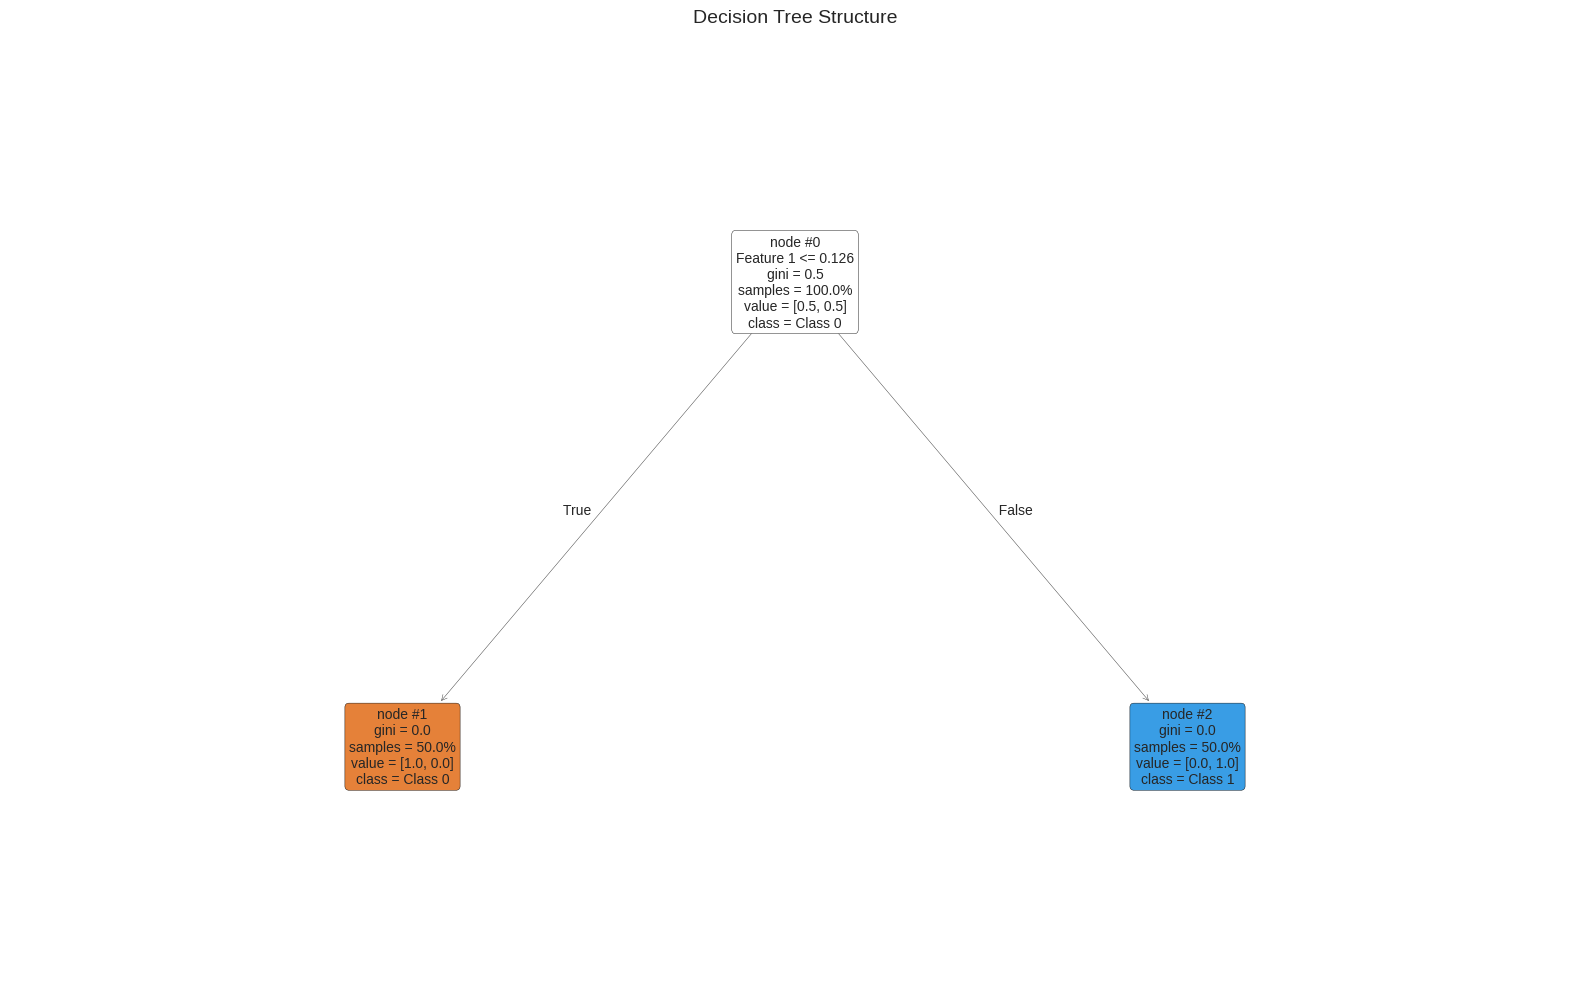

📝 Decision Tree Rules:
|--- Feature 1 <= 0.13
|   |--- class: 0.0
|--- Feature 1 >  0.13
|   |--- class: 1.0



In [17]:
# Train a decision tree
dt_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_simple.fit(X_simple, y_simple)

# Visualize the decision tree with smaller boxes
plt.figure(figsize=(16, 10))
plot_tree(dt_simple, feature_names=['Feature 1', 'Feature 2'], 
          class_names=['Class 0', 'Class 1'], filled=True, rounded=True,
          fontsize=10, node_ids=True, proportion=True)
plt.title('Decision Tree Structure', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Print tree as text
tree_text = export_text(dt_simple, feature_names=['Feature 1', 'Feature 2'])
print("📝 Decision Tree Rules:")
print(tree_text)


### 3.3 Decision Boundary Visualization


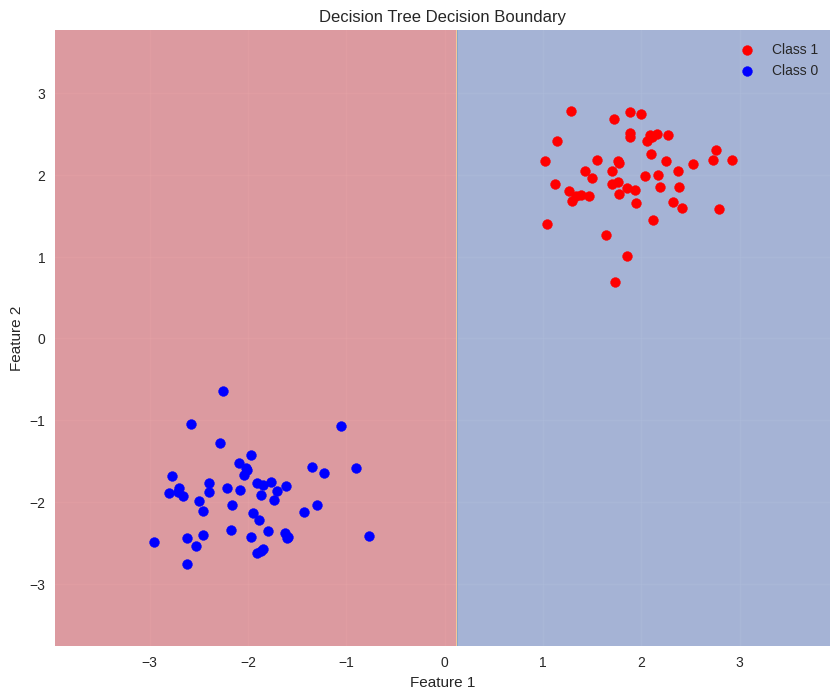

In [18]:
# Create a mesh for decision boundary
def plot_decision_boundary(model, X, y, title):
    """Plot decision boundary for a 2D dataset"""
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot decision boundary
plot_decision_boundary(dt_simple, X_simple, y_simple, 
                      'Decision Tree Decision Boundary')


## 4. Hyperparameter Tuning {#hyperparameter-tuning}

Decision Trees have several important hyperparameters that control their behavior:


### 4.1 Key Hyperparameters


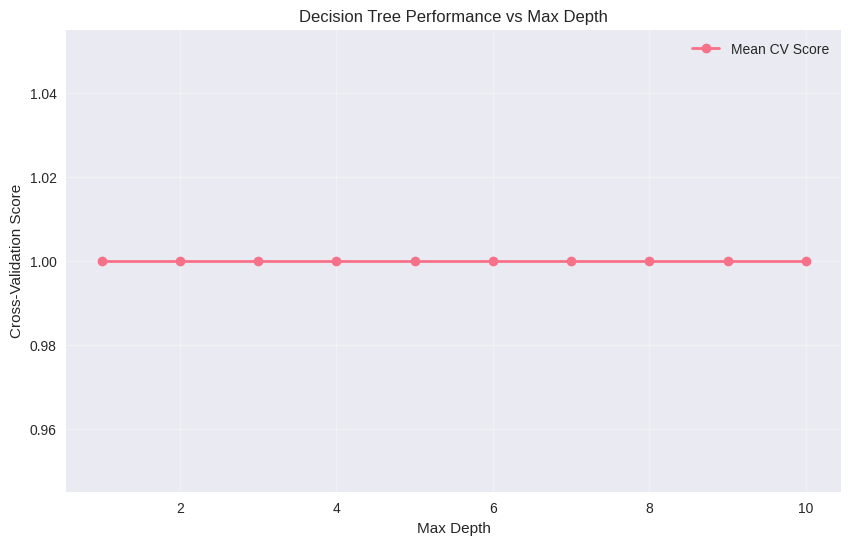

📊 Hyperparameter tuning complete!


In [19]:
# Test different hyperparameters
def test_hyperparameters(X, y, param_name, param_values):
    """Test different hyperparameter values"""
    train_scores = []
    val_scores = []
    
    for value in param_values:
        if param_name == 'max_depth':
            dt = DecisionTreeClassifier(max_depth=value, random_state=42)
        elif param_name == 'min_samples_split':
            dt = DecisionTreeClassifier(min_samples_split=value, random_state=42)
        elif param_name == 'min_samples_leaf':
            dt = DecisionTreeClassifier(min_samples_leaf=value, random_state=42)
        elif param_name == 'max_features':
            dt = DecisionTreeClassifier(max_features=value, random_state=42)
        
        # Cross-validation
        cv_scores = cross_val_score(dt, X, y, cv=5)
        train_scores.append(cv_scores.mean())
        val_scores.append(cv_scores.std())
    
    return train_scores, val_scores

# Test max_depth
max_depths = range(1, 11)
train_scores, val_scores = test_hyperparameters(X_simple, y_simple, 'max_depth', max_depths)

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Mean CV Score', linewidth=2)
plt.fill_between(max_depths, 
                 np.array(train_scores) - np.array(val_scores),
                 np.array(train_scores) + np.array(val_scores), 
                 alpha=0.2)
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation Score')
plt.title('Decision Tree Performance vs Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("📊 Hyperparameter tuning complete!")


### 4.2 Overfitting Demonstration


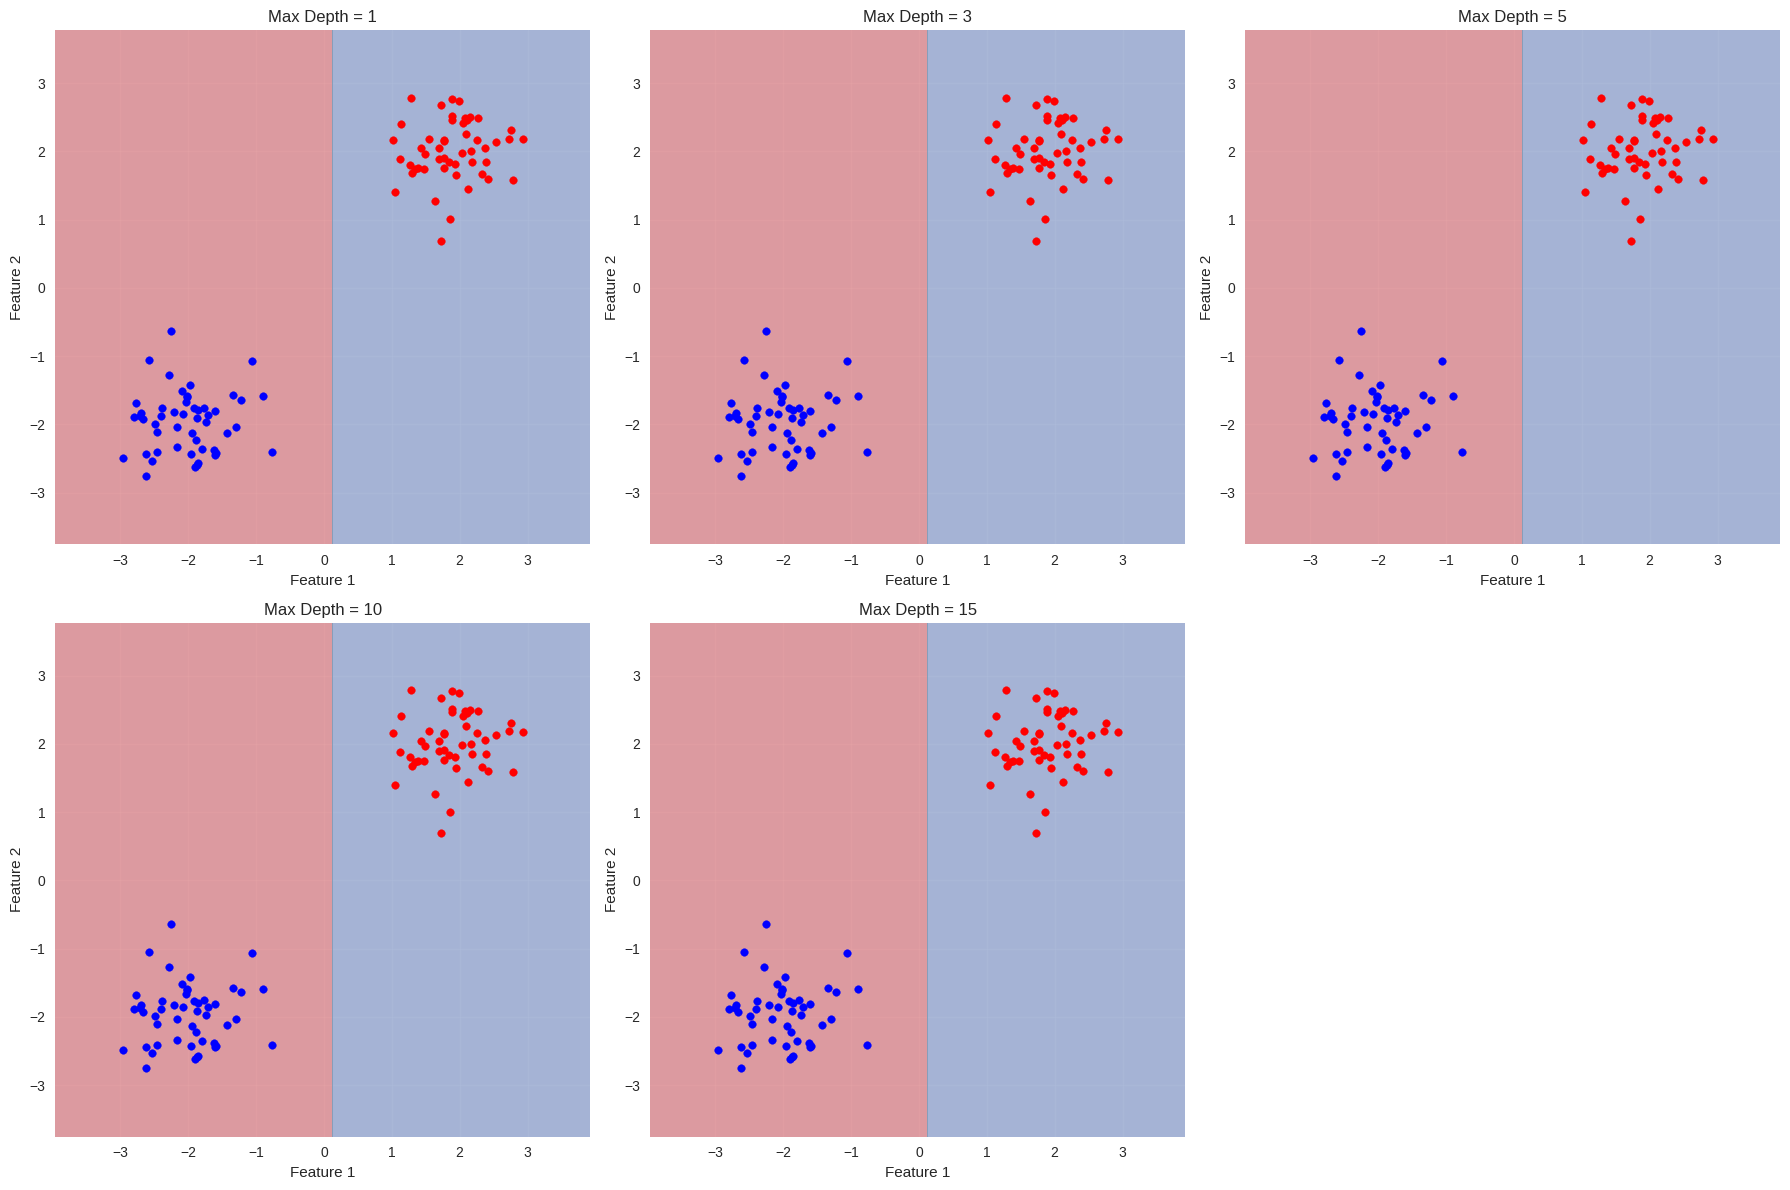

🎯 Overfitting demonstration complete!
💡 Notice how deeper trees create more complex boundaries


In [20]:
# Demonstrate overfitting with different depths
depths = [1, 3, 5, 10, 15]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, depth in enumerate(depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_simple, y_simple)
    
    # Plot decision boundary
    h = 0.01
    x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
    y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[i].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    axes[i].scatter(X_simple[y_simple == 1, 0], X_simple[y_simple == 1, 1], 
                   c='red', label='Class 1', s=30)
    axes[i].scatter(X_simple[y_simple == 0, 0], X_simple[y_simple == 0, 1], 
                   c='blue', label='Class 0', s=30)
    axes[i].set_title(f'Max Depth = {depth}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

print("🎯 Overfitting demonstration complete!")
print("💡 Notice how deeper trees create more complex boundaries")


## 5. Feature Importance Analysis {#feature-importance}

Decision Trees can show which features are most important for making predictions:


### 5.1 Feature Importance on Iris Dataset


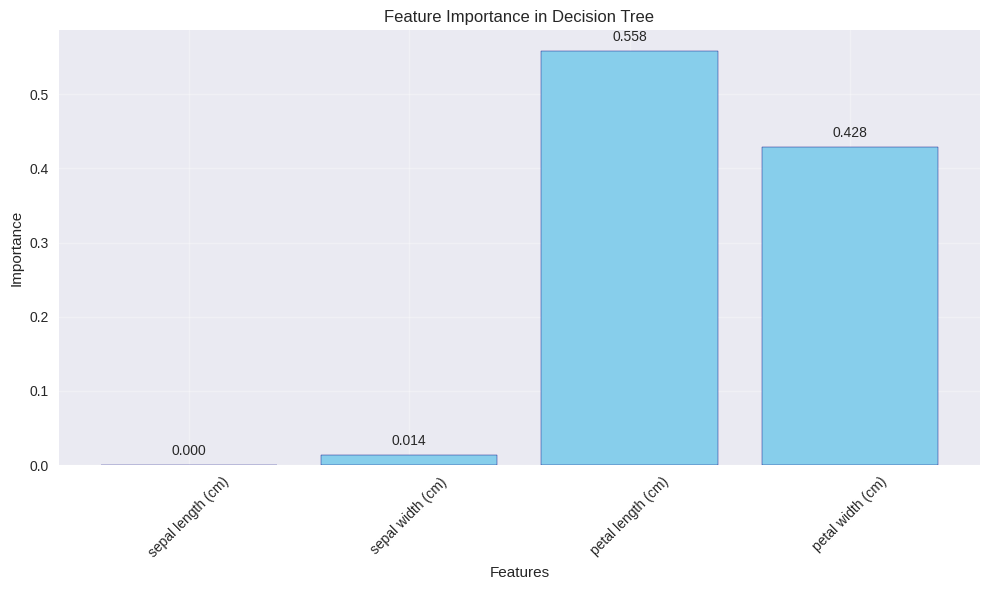

📊 Feature importance analysis complete!
💡 Petal length and width are most important for iris classification


In [21]:
# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

# Train decision tree
dt_iris = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_iris.fit(X_iris, y_iris)

# Get feature importance
feature_importance = dt_iris.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, feature_importance, color='skyblue', edgecolor='navy')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("📊 Feature importance analysis complete!")
print("💡 Petal length and width are most important for iris classification")


## 6. Practical Examples {#practical-examples}

### 6.1 Classification Example - Wine Dataset


Wine dataset shape: (178, 13)
Number of classes: 3
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']...

🎯 Wine Classification Results:
Accuracy: 0.944

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



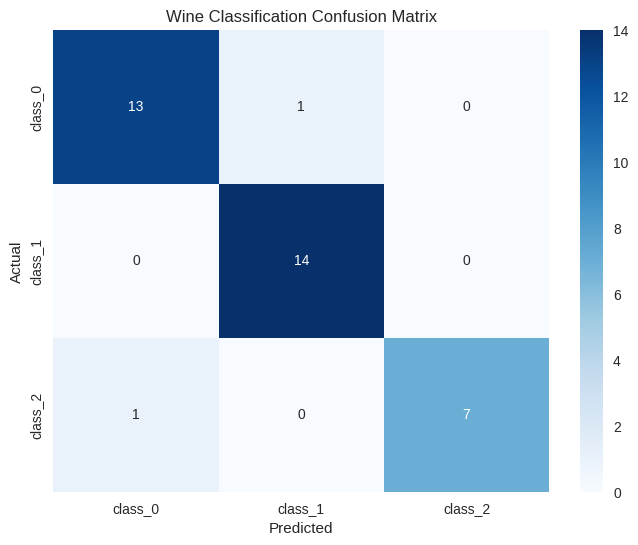

In [22]:
# Load Wine dataset
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target
wine_feature_names = wine.feature_names

print(f"Wine dataset shape: {X_wine.shape}")
print(f"Number of classes: {len(np.unique(y_wine))}")
print(f"Feature names: {wine_feature_names[:5]}...")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Train decision tree
dt_wine = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_wine.fit(X_train, y_train)

# Make predictions
y_pred = dt_wine.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Wine Classification Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Wine Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 6.2 Regression Example - California Housing


California Housing dataset shape: (20640, 8)
Target range: $0 - $5
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

🏠 California Housing Regression Results:
R² Score: 0.621
MSE: 0.497


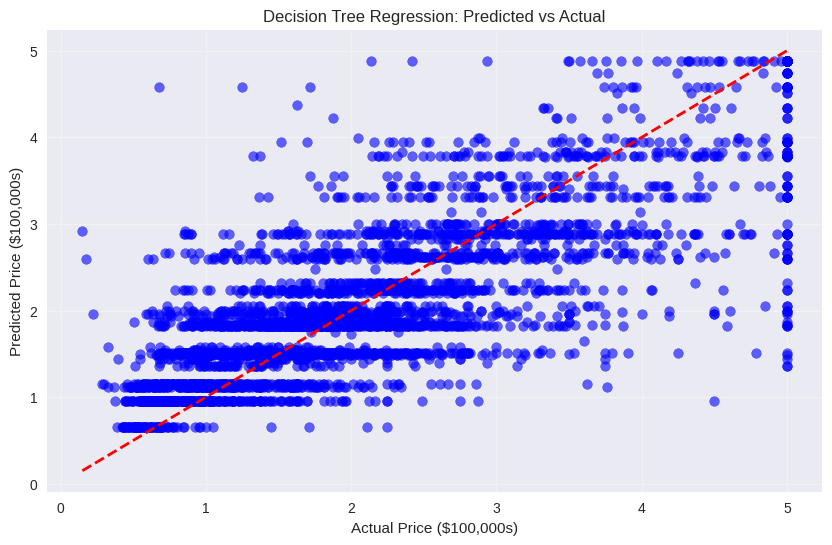

In [23]:
# Load California Housing dataset (replaces Boston Housing)
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target
housing_feature_names = housing.feature_names

print(f"California Housing dataset shape: {X_housing.shape}")
print(f"Target range: ${y_housing.min():.0f} - ${y_housing.max():.0f}")
print(f"Feature names: {housing_feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Train regression tree
dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred = dt_reg.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = np.mean((y_test - y_pred) ** 2)

print(f"\n🏠 California Housing Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title('Decision Tree Regression: Predicted vs Actual')
plt.grid(True, alpha=0.3)
plt.show()


## 7. Decision Tree vs Random Forest {#dt-vs-rf}

Let's compare Decision Trees with Random Forest to see the differences:


### 7.1 Performance Comparison


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Compare Decision Tree vs Random Forest
def compare_models(X, y, dataset_name):
    """Compare Decision Tree vs Random Forest performance"""
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Decision Tree
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)
    dt_score = dt.score(X_test, y_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    
    # Cross-validation scores
    dt_cv = cross_val_score(dt, X, y, cv=5).mean()
    rf_cv = cross_val_score(rf, X, y, cv=5).mean()
    
    return {
        'Dataset': dataset_name,
        'Decision Tree': f"{dt_score:.3f}",
        'Random Forest': f"{rf_score:.3f}",
        'DT CV': f"{dt_cv:.3f}",
        'RF CV': f"{rf_cv:.3f}"
    }

# Compare on different datasets
results = []
results.append(compare_models(X_iris, y_iris, "Iris"))
results.append(compare_models(X_wine, y_wine, "Wine"))

# Create comparison table
df_comparison = pd.DataFrame(results)
print("📊 Decision Tree vs Random Forest Comparison:")
print(df_comparison.to_string(index=False))


📊 Decision Tree vs Random Forest Comparison:
Dataset Decision Tree Random Forest DT CV RF CV
   Iris         1.000         1.000 0.953 0.967
   Wine         0.944         1.000 0.865 0.972


### 7.2 Overfitting Comparison


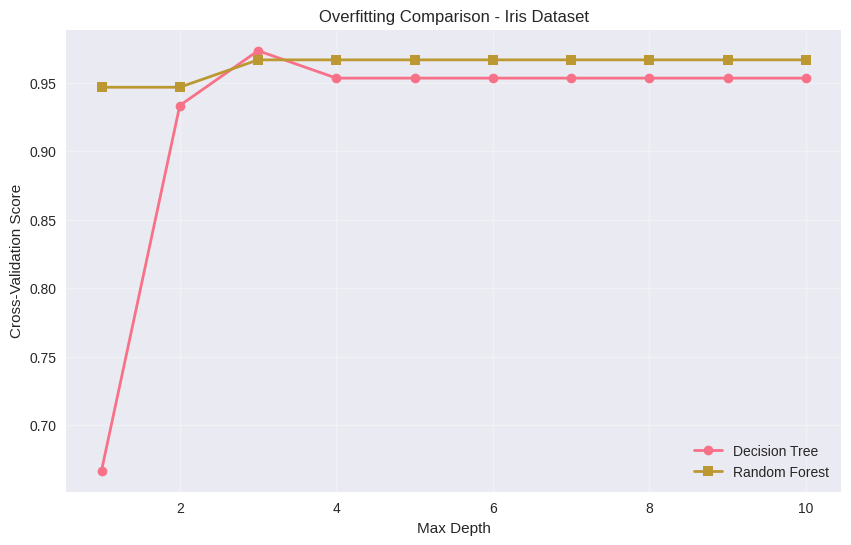

In [25]:
# Demonstrate overfitting differences
def plot_overfitting_comparison(X, y, dataset_name):
    """Compare overfitting between Decision Tree and Random Forest"""
    
    depths = range(1, 11)
    dt_scores = []
    rf_scores = []
    
    for depth in depths:
        # Decision Tree
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dt_cv = cross_val_score(dt, X, y, cv=5).mean()
        dt_scores.append(dt_cv)
        
        # Random Forest
        rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
        rf_cv = cross_val_score(rf, X, y, cv=5).mean()
        rf_scores.append(rf_cv)
    
    plt.figure(figsize=(10, 6))
    plt.plot(depths, dt_scores, 'o-', label='Decision Tree', linewidth=2)
    plt.plot(depths, rf_scores, 's-', label='Random Forest', linewidth=2)
    plt.xlabel('Max Depth')
    plt.ylabel('Cross-Validation Score')
    plt.title(f'Overfitting Comparison - {dataset_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot comparison for Iris dataset
plot_overfitting_comparison(X_iris, y_iris, "Iris Dataset")


## 8. Summary and Key Takeaways {#summary}

### 8.1 Decision Tree Advantages


In [26]:
print("✅ Decision Tree Advantages:")
print("• Easy to understand and interpret")
print("• No need for feature scaling")
print("• Handles both numerical and categorical data")
print("• Can handle missing values")
print("• Fast training and prediction")
print("• Feature importance ranking")
print("• No assumptions about data distribution")


✅ Decision Tree Advantages:
• Easy to understand and interpret
• No need for feature scaling
• Handles both numerical and categorical data
• Can handle missing values
• Fast training and prediction
• Feature importance ranking
• No assumptions about data distribution


### 8.2 Decision Tree Disadvantages


In [27]:
print("❌ Decision Tree Disadvantages:")
print("• Prone to overfitting")
print("• High variance (unstable)")
print("• Can create biased trees if some classes dominate")
print("• Sensitive to small changes in data")
print("• Poor performance on linear relationships")
print("• Can create overly complex trees")


❌ Decision Tree Disadvantages:
• Prone to overfitting
• High variance (unstable)
• Can create biased trees if some classes dominate
• Sensitive to small changes in data
• Poor performance on linear relationships
• Can create overly complex trees


### 8.3 When to Use Decision Trees


In [28]:
print("🎯 When to Use Decision Trees:")
print("• Need interpretable models")
print("• Small to medium datasets")
print("• Mixed data types")
print("• Feature selection is important")
print("• Quick prototyping")
print("• As building blocks for ensemble methods")


🎯 When to Use Decision Trees:
• Need interpretable models
• Small to medium datasets
• Mixed data types
• Feature selection is important
• Quick prototyping
• As building blocks for ensemble methods


### 8.4 Key Hyperparameters


In [29]:
print("⚙️ Key Hyperparameters:")
print("• max_depth: Maximum tree depth")
print("• min_samples_split: Minimum samples to split")
print("• min_samples_leaf: Minimum samples per leaf")
print("• max_features: Number of features to consider")
print("• criterion: Splitting criterion (gini, entropy)")
print("• random_state: For reproducibility")


⚙️ Key Hyperparameters:
• max_depth: Maximum tree depth
• min_samples_split: Minimum samples to split
• min_samples_leaf: Minimum samples per leaf
• max_features: Number of features to consider
• criterion: Splitting criterion (gini, entropy)
• random_state: For reproducibility


### 8.5 Best Practices


In [30]:
print("💡 Best Practices:")
print("• Use cross-validation for hyperparameter tuning")
print("• Prune trees to prevent overfitting")
print("• Consider ensemble methods for better performance")
print("• Visualize trees to understand decisions")
print("• Monitor feature importance")
print("• Use early stopping if available")


💡 Best Practices:
• Use cross-validation for hyperparameter tuning
• Prune trees to prevent overfitting
• Consider ensemble methods for better performance
• Visualize trees to understand decisions
• Monitor feature importance
• Use early stopping if available


---

## 🎉 Conclusion

Decision Trees are powerful, interpretable machine learning algorithms that form the foundation of many ensemble methods. They're excellent for:

- **Understanding data patterns**
- **Feature selection**
- **Quick prototyping**
- **Building ensemble models**

While they have limitations like overfitting, they're invaluable tools in the machine learning toolkit, especially when combined with ensemble techniques like Random Forest!

**Next Steps:**
- Try different hyperparameters
- Experiment with different datasets
- Explore ensemble methods
- Practice feature engineering

Happy learning! 🌳📊
